This requires a file 'dataset' which contains folders of class and subfolder of images corresponding to respective class. Unlike the other project this is done with pre-trained model 'MobileNet', you can use other pre-trained models as well. In this we won't be doing Fine-tunning Model. Just using pre-trained model modified with our requirements. And finding similar images with NearestNeighbors as same in the other project.

#  This is not the assignment I submitted. This is just added after the deadline and just for github repository purpose

In [1]:
import os
import cv2
import pickle
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.python.keras.api import keras

%matplotlib inline

In [2]:
with open('path_dict.pickle', 'rb') as f:
    paths = pickle.load(f)

In [3]:
import numpy as np

data = []
for key in paths.keys():
    print('Completing Key:', key, end=' ')
    for image in os.listdir(paths[key]):
        img = cv2.imread(os.path.join(paths[key], image))
        data.append(img)
    print('Completed!')

data = np.array(data)

Completing Key: cheetah Completed!
Completing Key: fox Completed!
Completing Key: leopard Completed!
Completing Key: lion Completed!
Completing Key: tiger Completed!
Completing Key: wolf Completed!


In [4]:
x_train, x_test = train_test_split(data, test_size=0.25, shuffle=True, random_state=4)

In [5]:
del data

In [6]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [7]:
mobilenet = keras.applications.MobileNet(input_shape=(96, 96, 3), include_top=False, weights='imagenet')

mobilenet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 97, 97, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 48, 48, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 48, 48, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 48, 48, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 48, 48, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 48, 48, 32) 

In [8]:
inputs = keras.Input(shape=[96,96,3])
x = mobilenet(inputs)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(128, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
mobilenet_1.00_224 (Function (None, 3, 3, 1024)        3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               131200    
Total params: 3,360,064
Trainable params: 3,338,176
Non-trainable params: 21,888
_________________________________________________________________


In [9]:
x_train_embeddings = model.predict(x_train_scaled)
x_test_embeddings = model.predict(x_test_scaled)

In [10]:
del x_train_scaled, x_test_scaled

In [11]:
nn = NearestNeighbors(n_neighbors=9, metric='cosine')
nn.fit(x_train_embeddings)

NearestNeighbors(metric='cosine', n_neighbors=9)

In [12]:
def plotting(img_query, img_retrieval):
    plt.figure()
    plt.imshow(cv2.cvtColor(img_query, cv2.COLOR_BGR2RGB))
    plt.title('Query Image')
    plt.figure()
    for i, img in enumerate(img_retrieval):
        plt.subplot(3,3,i+1)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

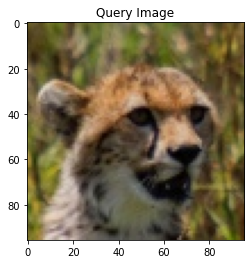

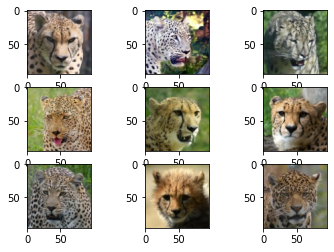

In [18]:
num = np.random.randint(len(x_test))

img_query = x_test[num]
indices = nn.kneighbors([x_test_embeddings[num]], return_distance=False)
img_retrieval = [x_train[idx] for idx in indices.flatten()]

plotting(img_query, img_retrieval)